# Parte 1 - Avaliação de Árvore de Decisão com métricas para classificação

In [ ]:
# Leitura do Dataset
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)

# Dividir o conjunto de dados em treinamento e teste
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


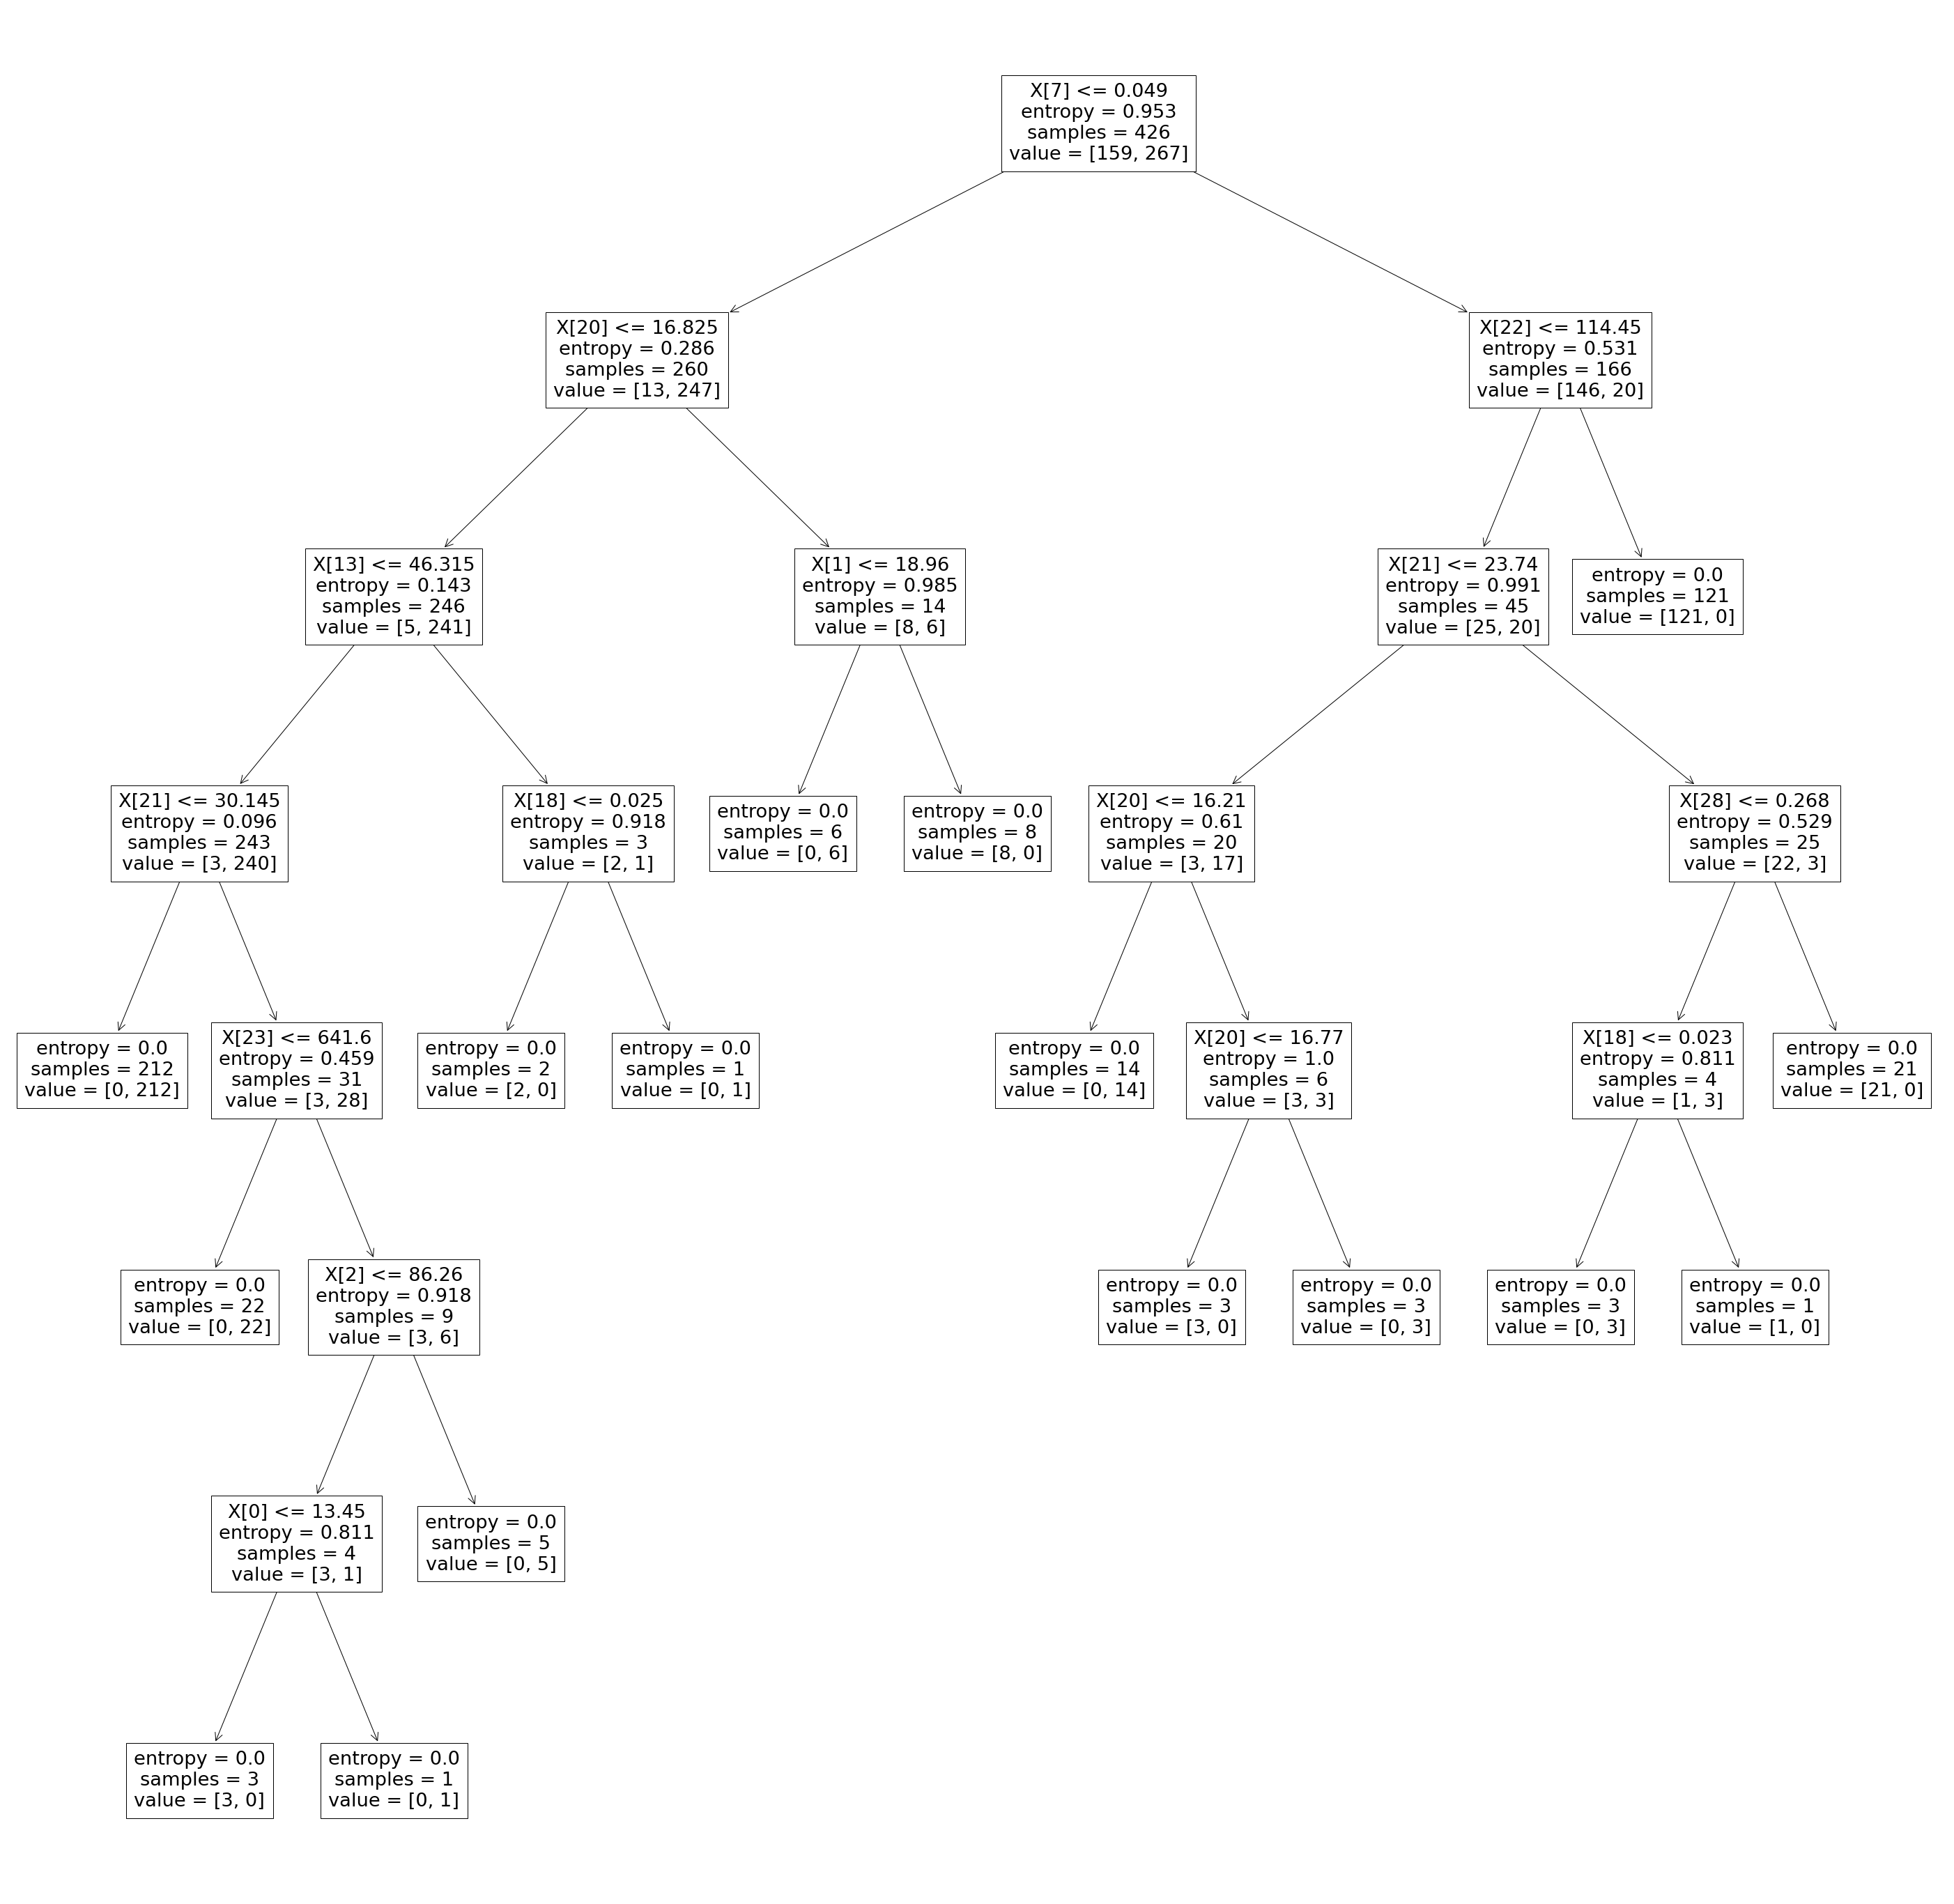

In [ ]:
# Aplicar o algoritmo de indução de árvore de decisão no conjunto de treinamento
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

# Gerar a figura da árvore de decisão 
from matplotlib import pyplot as plt 
fig=plt.figure(figsize=(50,50))
fig=tree.plot_tree(clf)

# Fazer a classificação dos dados de teste
predicted=clf.predict(X_test)

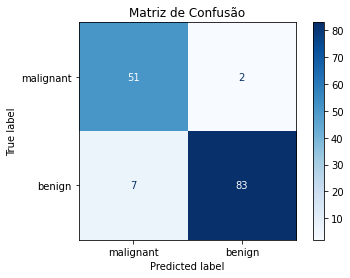

In [ ]:
# Econtrar a matriz de confusão
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_wine
breast_cancer = load_breast_cancer()
class_names = breast_cancer.target_names
title="Matriz de Confusão" 
disp=plot_confusion_matrix(clf,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.show() 


In [ ]:
# Mostrando os resultados da função classification_report() 
from sklearn.metrics import classification_report
print("Relatóriodeavaliaçãodoclassificador:\n")
print(f"{classification_report(y_test,predicted)}\n")

Relatóriodeavaliaçãodoclassificador:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.98      0.92      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143




# Parte 1 - Relatório 


*   O dataset UCI ML Breast Cancer Wisconsin (Diagnostic) utilizado é carregado de sklearn.datasets utilizando a função load_breast_cancer.  
*   O conjunto de dados do câncer de mama é um conjunto de dados de classificação binária clássico e fácil
*   A cópia do dataset UCI ML Breast Cancer Wisconsin (Diagnostic)  foi baixada de https://goo.gl/U2Uwz2
*   Após ser carregado, o conjunto foi dividido em treinamento e teste usando a função **train_test_split** do módulo **sklearn.model_selection**.
*   Usando a função fit() da classe **DecisionTreeClassifier** do módulo **sklearn.tree** (com o atributo criterion=’entropy), gerou-se um modelo utilizando o algoritmo de indução de árvore de decisão no conjunto de treinamento.
*   Depois de gerado o modelo, gerou-se também uma figura da árvore usando função **plot_tree()** do módulo **sklearn.tree**. 
*   Também usando classe DecisionTreeClassifier do módulo sklearn.tree fez-se a classificação dos dados de teste usando a função predict.
*   Encontrou-se a matriz de confusão e as medidas de precisão, revocação, medida F e acurácia, sendo mostradas em seguida.

# Parte 2 - Método do "Cotovelo"

In [ ]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Leitura do conjunto de dados
data = pd.read_csv('Chemical Composion of Ceramic.csv')
data = data.drop('Ceramic Name', 1) # Retirar atributo nome do dataset
data.head()

,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [ ]:
# Definir a lista de atributos categóricos e atributos contínuos
categorical_features = ['Part']
continuous_features = ['Na2O','MgO','Al2O3','SiO2','K2O','CaO','TiO2','Fe2O3','MnO','CuO','ZnO','PbO2','Rb2O','SrO','Y2O3','ZrO2','P2O5']
data[continuous_features].describe()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.10125,1.561591,818.750000,30.909091,95.340909,38.522727,310.454545,228.863636,42.954545,145.454545,440.909091
std,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.05343,0.604276,614.240607,19.096630,33.901441,26.589246,69.809414,256.216646,12.879556,60.074840,402.653944
min,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.04000,0.580000,180.000000,0.000000,20.000000,0.000000,180.000000,-10.000000,20.000000,50.000000,50.000000
25%,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.07000,1.097500,380.000000,20.000000,70.000000,20.000000,250.000000,10.000000,30.000000,100.000000,97.500000
50%,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.08000,1.510000,590.000000,30.000000,90.000000,30.000000,320.000000,75.000000,40.000000,140.000000,365.000000
75%,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.13000,1.925000,982.500000,40.000000,112.500000,60.000000,370.000000,482.500000,50.000000,170.000000,697.500000
max,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.29000,3.110000,2970.000000,80.000000,230.000000,100.000000,450.000000,780.000000,80.000000,390.000000,1610.000000


In [ ]:
# Transformar atributos categóricos em binários
for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data, dummies], axis=1)
  data.drop(col, axis=1, inplace=True)
data.head()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5,Part_Body,Part_Glaze
0,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90,1,0
1,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110,1,0
2,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200,1,0
3,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210,1,0
4,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150,1,0


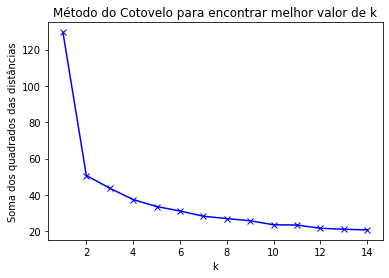

In [ ]:
# Normalizar atributos contínuos
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

# Fazer o agrupamento para cada quantidade de grupo no intervalo definido
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)
 
# Construir o gráfico número de clusters X índice
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

# Parte 2 - Relatório

*    O conjunto de dados Chemical Composition of Ceramic Samples Data utilizado é lido no formato .csv usaando a função **read.csv()** da biblioteca **pandas**. O conjunto pode ser usado para problemas de Classificação e Agrupamento.
*    O primeiro atributo do conjunto, nome dos compostos, que serve como ID é retirado utilizando a função **drop()**.
*    O atributo categórica binário **Part**('Body' ou 'Glaze') é colocado na lista de atributos categóricos. Todos os outros atributos, a porcetagem de vários componentes em amostras de cerâmica, são colocados na lista de atributos contínuos. 
*    Em seguida os atributos categóricos foram transformados em binários usando a função **get_dummies()** da biblioteca Pandas.
* Os atributos contínuos foram normalizados com a função **fit()** da classe **MinMaxScaler** do módulo **sklearn.preprocessing**.
* Utilizando um intervalo de valores para número de grupos de 2 a 15, aplicou-se o algoritmo k-means no conjunto de dados para todos os valores definidos definidos no intervalo utilizando a função **fit(**) da classe Kmeans do módulo **sklearn.cluster**. 
* Todos os valores do índice 'soma quadrática das distâncias' encontrados usando o atributo inertia_ da classeKmeans do módulo sklearn.cluster são guardados e foram usados para plotar o gráfico dos índices.
* Pelo Método do Cotovo observa-se que para K = 2 sendo esse ponto que indica o a menor diferença de variação entre os valores de K.